<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/5_desafio_teste_hipotese/desafio_teste_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Teste de Hip√≥teses

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import shapiro # teste normalidade
from scipy.stats import levene  # teste vari√¢ncia homog√™nea
from scipy.stats import kruskal # teste signific√¢ncia
from scipy.stats import pearsonr, spearmanr # correla√ß√£o

## Dados

| Vari√°vel | Descri√ß√£o |
| :- | :- |
| id_produto | C√≥digo identificador do suplemento (F√≥rmula 1, 2 ou 3). |
| id_atleta | C√≥digo identificador do atleta que participou do estudo.|
| ganho_massa | Quantidade de massa muscular ganha (em kg) ap√≥s 8 semanas de uso. |
| idade | Idade do atleta. |
| frequencia_treino | N√∫mero m√©dio de treinos semanais do atleta. |

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Teste de HipoÃÅtese/desafio_03_suplementos.csv')
df.head()

id_produto  id_atleta  ganho_massa  idade  frequencia_treino
0  F√≥rmula 3          1         2.24     27                  5
1  F√≥rmula 1          2         4.97     35                  4
2  F√≥rmula 3          3         0.88     30                  6
3  F√≥rmula 3          4         0.09     22                  6
4  F√≥rmula 1          5         2.47     18                  6

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_produto         300 non-null    object 
 1   id_atleta          300 non-null    int64  
 2   ganho_massa        300 non-null    float64
 3   idade              300 non-null    int64  
 4   frequencia_treino  300 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 11.8+ KB


In [4]:
print(f'H√° {df.shape[0]} linhas e {df.shape[1]} colunas.')

H√° 300 linhas e 5 colunas.


In [5]:
df.describe()

id_atleta  ganho_massa       idade  frequencia_treino
count  300.000000   300.000000  300.000000         300.000000
mean   150.500000     2.466733   28.123333           3.993333
std     86.746758     1.436384    6.493742           1.430657
min      1.000000     0.030000   18.000000           2.000000
25%     75.750000     1.267500   22.000000           3.000000
50%    150.500000     2.400000   28.000000           4.000000
75%    225.250000     3.612500   34.000000           5.000000
max    300.000000     4.980000   39.000000           6.000000

In [6]:
# id's por produto
df.groupby('id_produto')['id_produto'].count().reset_index(name='total')

id_produto  total
0  F√≥rmula 1     99
1  F√≥rmula 2     94
2  F√≥rmula 3    107

## Quest√µes

### 1.
Fa√ßa uma an√°lise explorat√≥ria dos dados:

* Qual √© a m√©dia e a mediana do ganho de massa para cada suplemento?


In [7]:
df.groupby('id_produto')['ganho_massa'].agg(['mean', 'median']).rename(columns={'mean': 'm√©dia', 'median': 'mediana'})


m√©dia  mediana
id_produto                   
F√≥rmula 1   2.656566     2.67
F√≥rmula 2   2.350106     2.15
F√≥rmula 3   2.393551     2.35

* Como os dados est√£o distribu√≠dos? Utilize histogramas e boxplots para visualizar as diferen√ßas entre as f√≥rmulas.

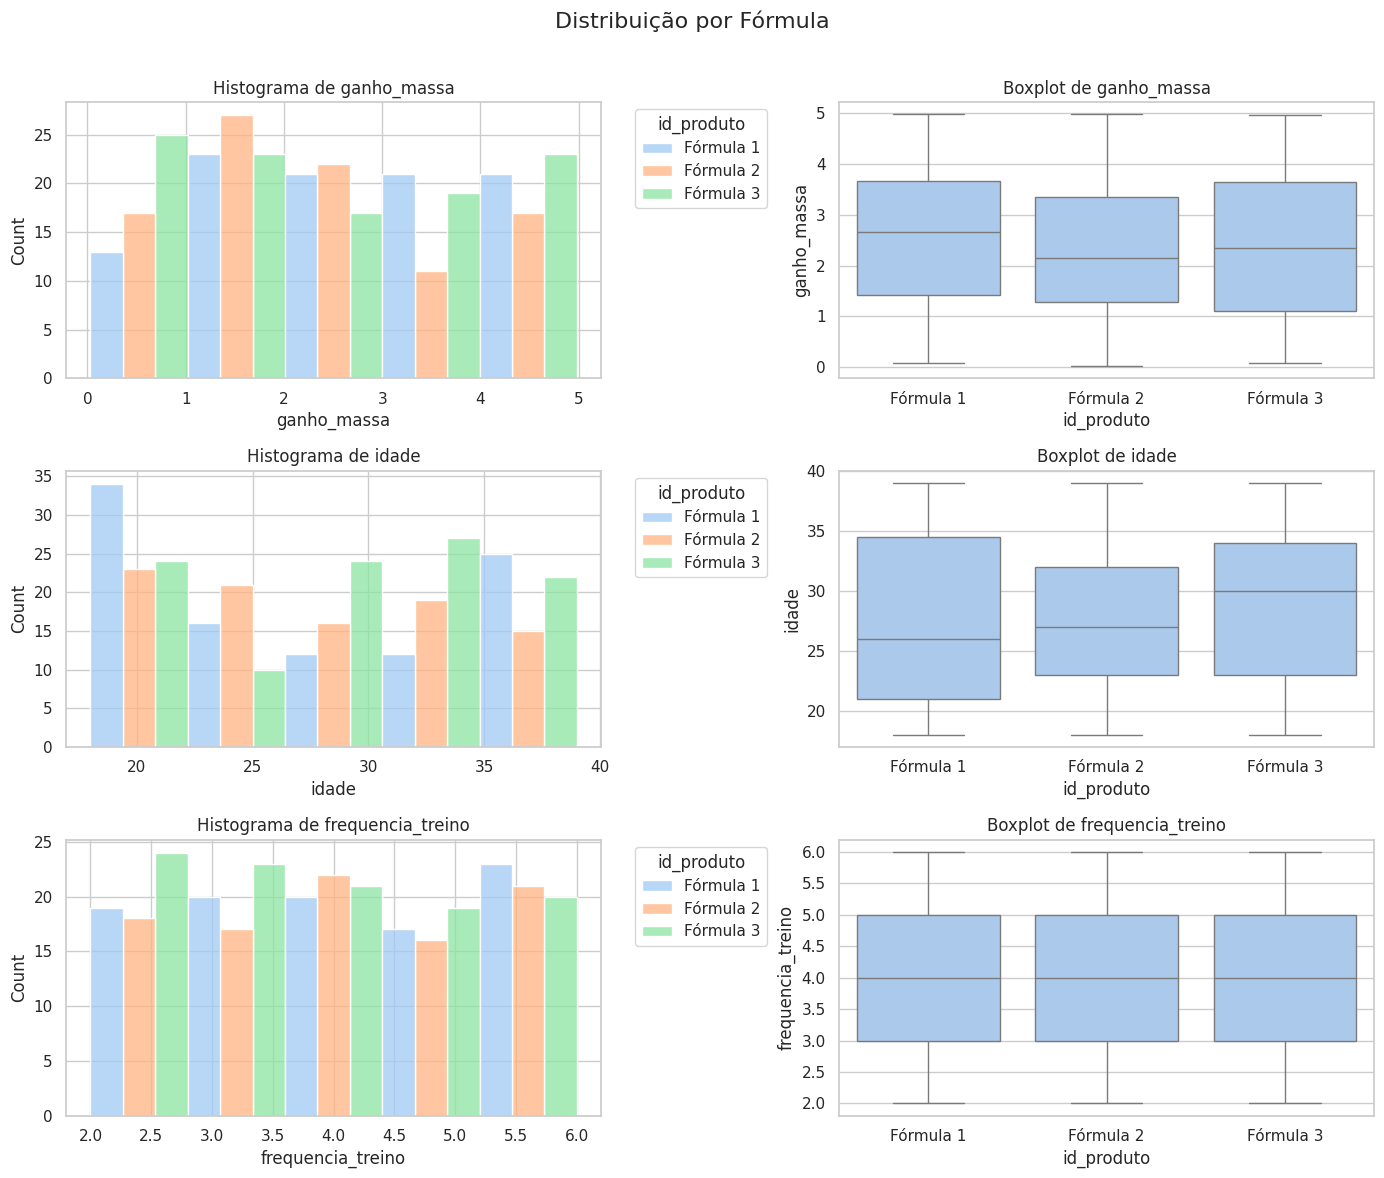

In [8]:
df_ = df.copy()
ordem = ['F√≥rmula 1', 'F√≥rmula 2', 'F√≥rmula 3']
df_['id_produto'] = pd.Categorical(df_['id_produto'], categories=ordem, ordered=True)

# Estilo dos gr√°ficos
sns.set(style="whitegrid", palette="pastel")

# Cria uma figura com subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Distribui√ß√£o por F√≥rmula', fontsize=16)

# Vari√°veis de interesse
variaveis = ['ganho_massa', 'idade', 'frequencia_treino']

# Loop para gerar histogramas e boxplots
for i, var in enumerate(variaveis):
    sns.histplot(data=df_, x=var, hue='id_produto', multiple='dodge', ax=axes[i, 0], bins=5)
    axes[i, 0].set_title(f'Histograma de {var}')
    axes[i, 0].legend_.set_bbox_to_anchor((1.05, 1))  # <- legenda fora

    sns.boxplot(data=df_, x='id_produto', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {var}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

* H√° outliers no ganho de massa muscular? O que isso pode indicar?

<font color=blue>O boxplot do ganho de massa muscular n√£o apresenta outliers. Isso pode indicar que os atletas apresentam caracter√≠sticas semelhantes e compar√°veis. Al√©m disso, pode indicar pouca possibilidade de haver alguma vari√°vel esp√∫ria relacionada aos atletas.</font>

### 2.
H√° diferen√ßa estatisticamente significativa no ganho de massa muscular entre as tr√™s f√≥rmulas?

<font color=blue>Para escolher o teste de signific√¢ncia a ser aplicado √© necess√°rio testar a normalidade e/ou verificar a diferen√ßa ou n√£o entre as vari√¢ncias.
<li>Se os dados forem normais e vari√¢ncias homog√™neas: ANOVA</li>
<li>Se n√£o forem normais ou vari√¢ncias forem diferentes: Teste de Kruskal-Wallis</li>

Se n√£o forem normais ou vari√¢ncias forem diferentes: Teste de Kruskal-Wallis</font>


| Situa√ß√£o |	Teste recomendado |
| :- | :- |
| Normal + vari√¢ncias iguais	| ANOVA |
| Algum grupo n√£o normal |	Kruskal-Wallis |
| Vari√¢ncias diferentes	| Kruskal-Wallis |

In [9]:
# Teste de normalidade por grupo
for grupo, dados in df.groupby('id_produto'):
    stat, p = shapiro(dados['ganho_massa'])
    print(f'{grupo}: stat={stat:.3f}, p={p:.4f}')
    if p < 0.05:
        print("  ‚ùå N√£o √© normal")
    else:
        print("  ‚úÖ √â normal")


F√≥rmula 1: stat=0.959, p=0.0036
  ‚ùå N√£o √© normal
F√≥rmula 2: stat=0.952, p=0.0018
  ‚ùå N√£o √© normal
F√≥rmula 3: stat=0.942, p=0.0002
  ‚ùå N√£o √© normal


In [10]:
# Divide os grupos
grupos = [grupo['ganho_massa'].values for _, grupo in df.groupby('id_produto')]

# Teste de Levene
stat, p = levene(*grupos)
print(f'Teste de Levene: stat={stat:.3f}, p={p:.4f}')
if p < 0.05:
    print("  ‚ùå Vari√¢ncias diferentes (heterocedasticidade)")
else:
    print("  ‚úÖ Vari√¢ncias homog√™neas")


Teste de Levene: stat=1.291, p=0.2765
  ‚úÖ Vari√¢ncias homog√™neas


<font color=blue>
Hip√≥tese nula: "N√£o h√° diferen√ßa estatisticamente significativa entre os grupos."<br>
<li>H0: p = 0</li>
Hip√≥tese alternativa: "H√° diferen√ßa estatisticamente significativa entre os grupos."
<li>H1: p != 0</li>
<br>
Como os grupos n√£o apresentam distribui√ß√£o normal, optou-se pelo teste de Kruskal-Wallis.
</font>


In [11]:
# Teste de Kruskal-Wallis
grupos = [grupo['ganho_massa'].values for nome, grupo in df_.groupby('id_produto', observed=False)]
stat, p_valor = kruskal(*grupos)

print(f'Estat√≠stica H = {stat:.2f}')
print(f'Valor-p = {p_valor:.4f}')

if p_valor < 0.05:
    print("‚û°Ô∏è H√° diferen√ßa estatisticamente significativa entre os grupos.")
else:
    print("‚û°Ô∏è N√£o h√° diferen√ßa estatisticamente significativa entre os grupos.")

Estat√≠stica H = 2.65
Valor-p = 0.2662
‚û°Ô∏è N√£o h√° diferen√ßa estatisticamente significativa entre os grupos.


### 3.
Existe correla√ß√£o entre idade e ganho de massa muscular? Atletas mais jovens ou mais velhos t√™m resultados diferentes?

<font color=blue>
Scatterplot ajuda a ver a tend√™ncia geral.
<li>A F√≥rmula 2 apresenta maior ganho de massa muscular em idades mais jovens.</li>
<li>As F√≥rmulas 1 e 3 apresentam leve varia√ß√£o entre as idades.</li>
</font>

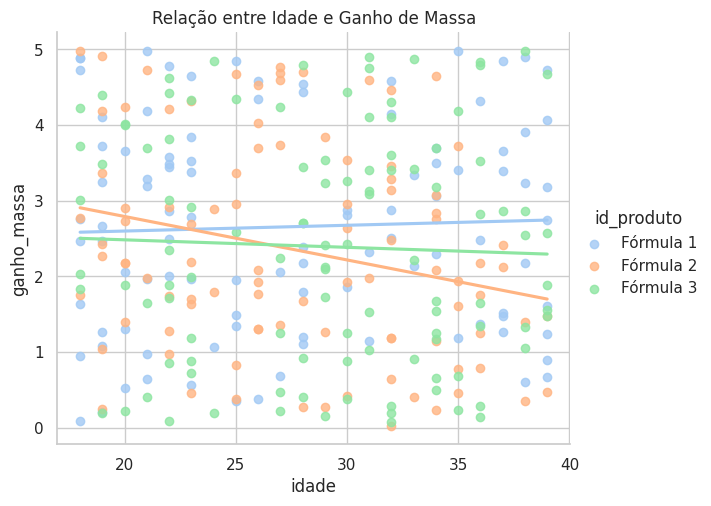

In [12]:
sns.lmplot(data=df_, x='idade', y='ganho_massa', hue='id_produto', ci=None, height=5, aspect=1.2)
plt.title('Rela√ß√£o entre Idade e Ganho de Massa')
plt.show()

<font color=blue>
Hip√≥tese nula: "N√£o existe correla√ß√£o entre idade e ganho de massa muscular"<br>
<li>H0: p = 0</li>
Hip√≥tese alternativa: "Existe correla√ß√£o entre idade e ganho de massa muscular"
<li>H1: p != 0</li>
<br>
Poss√≠veis interpreta√ß√µes:
<li>rho positivo ‚Üí quanto maior a idade, maior o ganho</li>
<li>rho negativo ‚Üí quanto maior a idade, menor o ganho</li>
<li>Valor-p < 0.05 ‚Üí correla√ß√£o significativa</li>
<li>Valor de correla√ß√£o perto de 0 ‚Üí correla√ß√£o fraca ou inexistente</li>
<br>
Os dados apresentaram correla√ß√£o de -0.08, ou seja, entre todas as f√≥rmulas quanto maior a idade, menor √© o ganho de massa muscular.
<br><br>
O valor-p de 0.1847 indica que a correla√ß√£o n√£o √© estatisticamente significativa ao n√≠vel de signific√¢ncia padr√£o (Œ± = 0.05). Ou seja:
<li>p = 0.1847 > 0.05 ‚Üí N√£o rejeitamos a hip√≥tese nula (H0)</li>
<br>
Portanto, n√£o temos evid√™ncias suficientes para afirmar que idade influencia o ganho de massa muscular neste conjunto de dados.
</font>

In [13]:
# Correla√ß√£o de Spearman (dados n√£o normais)
spearman_corr, p_spearman = spearmanr(df_['idade'], df_['ganho_massa'])
print(f'Correla√ß√£o de Spearman: rho = {spearman_corr:.2f}, p = {p_spearman:.4f}')

Correla√ß√£o de Spearman: rho = -0.08, p = 0.1847


### 4.
Atletas que treinam mais frequentemente ganham mais massa muscular independentemente do suplemento?

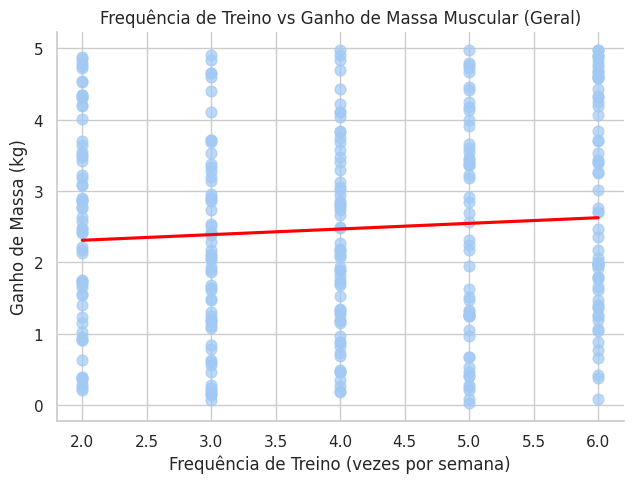

In [14]:
sns.lmplot(
    data=df_,
    x='frequencia_treino',
    y='ganho_massa',
    ci=None,          # sem intervalo de confian√ßa
    height=5,
    aspect=1.3,
    scatter_kws={'s': 60, 'alpha': 0.7},  # bolinhas maiores e transparentes
    line_kws={'color': 'red'}             # linha vermelha
)

plt.title('Frequ√™ncia de Treino vs Ganho de Massa Muscular (Geral)')
plt.xlabel('Frequ√™ncia de Treino (vezes por semana)')
plt.ylabel('Ganho de Massa (kg)')
plt.tight_layout()
plt.show()


<font color=blue>
Graficamente, a rela√ß√£o entre frequ√™ncia de treino e ganho de massa muscular, sem separar por suplemento, apresenta tend√™ncia de alta. Ou seja, quanto maior a quantidade de treinos, maior √© o ganho de massa muscular.
</font>

In [15]:
# Correla√ß√£o de Spearman entre frequ√™ncia e ganho de massa (sem separar por f√≥rmula)
corr_spearman, p_valor_spearman = spearmanr(df_['frequencia_treino'], df_['ganho_massa'])

print(f'Correla√ß√£o de Spearman: œÅ = {corr_spearman:.2f}')
print(f'Valor-p = {p_valor_spearman:.4f}')
if p_valor_spearman < 0.05:
    print("‚û°Ô∏è Correla√ß√£o significativa entre frequ√™ncia de treino e ganho de massa.")
else:
    print("‚û°Ô∏è Sem evid√™ncia de correla√ß√£o significativa entre frequ√™ncia e ganho.")


Correla√ß√£o de Spearman: œÅ = 0.07
Valor-p = 0.2033
‚û°Ô∏è Sem evid√™ncia de correla√ß√£o significativa entre frequ√™ncia e ganho.


<font color=blue>
Hip√≥tese nula: "N√£o existe correla√ß√£o entre frequ√™ncia e ganho de massa muscular"<br>
<li>H0: p = 0</li>
Hip√≥tese alternativa: "Existe correla√ß√£o entre frequ√™ncia e ganho de massa muscular"
<li>H1: p != 0</li>
<br>
Poss√≠veis interpreta√ß√µes:
<li>œÅ positivo: √† medida que a frequ√™ncia aumenta, o ganho tende a aumentar.</li>
<li>œÅ negativo: mais treino ‚Üí menos ganho.</li>
<li>p < 0.05: correla√ß√£o estatisticamente significativa.</li>
<br>
Aplicando a correla√ß√£o de Spearman (os dados n√£o s√£o normalmente distribu√≠dos), n√£o h√° evid√™ncia de correla√ß√£o significativa entre frequ√™ncia e ganho de massa muscular. Portanto, n√£o se rejeita H0.
</font>

### 5.
Existe alguma correla√ß√£o entre idade, frequ√™ncia de treino e a efic√°cia do suplemento?

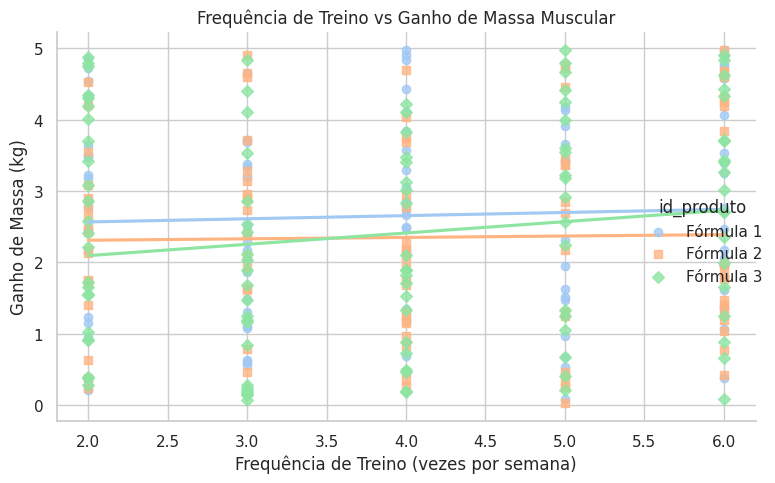

In [16]:
# linha de regress√£o por suplemento
sns.lmplot(
    data=df_,
    x='frequencia_treino',
    y='ganho_massa',
    hue='id_produto',
    ci=None,            # sem intervalo de confian√ßa
    height=5,
    aspect=1.3,
    markers=['o', 's', 'D']
)

plt.title('Frequ√™ncia de Treino vs Ganho de Massa Muscular')
plt.xlabel('Frequ√™ncia de Treino (vezes por semana)')
plt.ylabel('Ganho de Massa (kg)')
plt.tight_layout()
plt.show()

<font color=blue>
Graficamente, a rela√ß√£o entre frequ√™ncia de treino e ganho de massa muscular separando por suplemento:
<li>F√≥rmula 3 apresenta tend√™ncia de alta. Ou seja, quanto maior a quantidade de treinos, maior √© o ganho de massa muscular.</li>
<li>F√≥rmulas 1 e 2 apresentaram pouca varia√ß√£o no ganho de massa conforme aumenta-se a frequ√™ncia de treinos.</li>
</font>

In [17]:
# Lista √∫nica das f√≥rmulas
formulas = df['id_produto'].unique()

# Loop por f√≥rmula
for f in sorted(formulas, key=lambda x: int(x.split()[-1])):  # ordena como 1, 2, 3
    dados = df_[df_['id_produto'] == f]
    rho, p = spearmanr(dados['frequencia_treino'], dados['ganho_massa'])
    print(f"F√≥rmula {f} ‚ûú Spearman œÅ = {rho:.2f} | p = {p:.4f}")
    if p < 0.05:
        print("   ‚Ü≥ Correla√ß√£o significativa.")
    else:
        print("   ‚Ü≥ Correla√ß√£o n√£o significativa.")


F√≥rmula F√≥rmula 1 ‚ûú Spearman œÅ = 0.05 | p = 0.6418
   ‚Ü≥ Correla√ß√£o n√£o significativa.
F√≥rmula F√≥rmula 2 ‚ûú Spearman œÅ = -0.02 | p = 0.8701
   ‚Ü≥ Correla√ß√£o n√£o significativa.
F√≥rmula F√≥rmula 3 ‚ûú Spearman œÅ = 0.14 | p = 0.1456
   ‚Ü≥ Correla√ß√£o n√£o significativa.


<font color=blue>
Hip√≥tese nula: "N√£o existe correla√ß√£o entre frequ√™ncia e ganho de massa muscular"<br>
<li>H0: p = 0</li>
Hip√≥tese alternativa: "Existe correla√ß√£o entre frequ√™ncia e ganho de massa muscular"
<li>H1: p != 0</li>
<br>
Portanto, nenhuma das f√≥rmulas apresentaram correla√ß√£o significativa entre frequ√™ncia e ganho de massa, portanto, n√£o se rejeita H0.
</font>


### 6.
Qual f√≥rmula voc√™ recomendaria para atletas que treinam mais de 5 vezes por semana? Justifique sua escolha.

In [18]:
df_freq = df_.query('frequencia_treino > 5').copy()
df_freq.sample(5)

id_produto  id_atleta  ganho_massa  idade  frequencia_treino
275  F√≥rmula 1        276         4.58     26                  6
221  F√≥rmula 3        222         4.33     23                  6
290  F√≥rmula 2        291         1.40     20                  6
57   F√≥rmula 1         58         2.76     18                  6
186  F√≥rmula 3        187         3.40     32                  6

In [19]:
df_freq[['ganho_massa',	'idade', 'frequencia_treino']].describe()

ganho_massa     idade  frequencia_treino
count    64.000000  64.00000               64.0
mean      2.829687  26.78125                6.0
std       1.471458   6.37323                0.0
min       0.090000  18.00000                6.0
25%       1.640000  22.00000                6.0
50%       2.705000  26.00000                6.0
75%       4.322500  31.00000                6.0
max       4.980000  39.00000                6.0

In [20]:
media = df_freq.groupby('id_produto', observed=False)['ganho_massa'].mean().sort_index()
mediana = df_freq.groupby('id_produto', observed=False)['ganho_massa'].median().sort_index()

print("üìä Ganho de Massa entre atletas que treinam mais de 5x por semana:")
print("\nM√©dia por f√≥rmula:\n", media)
print("\nMediana por f√≥rmula:\n", mediana)

üìä Ganho de Massa entre atletas que treinam mais de 5x por semana:

M√©dia por f√≥rmula:
 id_produto
F√≥rmula 1    3.012609
F√≥rmula 2    2.566190
F√≥rmula 3    2.896000
Name: ganho_massa, dtype: float64

Mediana por f√≥rmula:
 id_produto
F√≥rmula 1    2.760
F√≥rmula 2    1.920
F√≥rmula 3    3.135
Name: ganho_massa, dtype: float64


In [21]:
sns.boxplot(data=df_freq, x='id_produto', y='ganho_massa')
plt.title('Ganho de Massa por F√≥rmula (treino > 5x/semana)')
plt.xlabel('F√≥rmulas')
plt.ylabel('Ganho de Massa (kg)')
plt.show()


<font color=blue>As f√≥rmulas 1 e 3 possuem o maior valor m√≠nimo no ganho de massa. Al√©m disso, a f√≥rmula 1 possui o maior valor m√°ximo. Portanto, a f√≥rmula 1 seria recomendada por apresentar a maior possibilidade de ganho de massa muscular. Apesar da mediana da f√≥rmula 1 ser menor do que da f√≥rmula 3 por conta da maior dispers√£o dos dados.
</font>